
Assignment Guidelines
Assignment 1 – Programming Concepts

Dated: 19th December 2021
Batch: AI03
Trimester: 1							 
Module Name: Programming Essentials for Artificial Intelligence
Mentor: Pradeepta Mishra
Marks:  10
		
Objective :
1.	To learn how to perform Univariate and bi-variate analysis on a given dataset.
2.	To learn how to perform groupby using pivot table in pandas.
3.	To learn how to handle missing values and categorical features.

Assignment Details: 
Complete the below mentioned tasks as a part of your Assignment:
1.	Read the dataset from the given link (Link for dataset: https://archive.ics.uci.edu/ml/datasets/bank+marketing) and prepare at least 5 features from this dataset.
2.	Prepare the univariate, bi-variate of some meaningful features, display the graphs for them.
3.	Perform groupby using pivot table in pandas, compute the mean, median, min, max and std dev.
4.	Find the missing values and clean them using mean imputation.
5.	Convert the categorical features to dummy variables using either pandas function or python loop function.

Outcome:
1.	Participants will be able to perform Univariate and Bi-variate analysis on any given dataset and visualize them.
2.	Participants will be able to perform groupby using pivot tables in pandas and perform important computations for analysis.
3.	Participants will learn how to handle missing values in a dataset.
4.	Participants will learn how to handle categorical features using pandas function or using python loop function.

Submission Guidelines:
•	Submit the Python Notebook file(s) with proper comments and a brief description of each step executed.
•	Please follow this path to submit the assignment on LMS (reva.linkstreet.in). Sign in to LMS and go to dashboard (Topmost option on Left most side column) > Go to the channel –> Go to the post “Assignment & Assessments” > On the right-hand side of the screen you will see – “Assignment 1…” > Click on “Start” > Upload your assignment. 
•	Kindly upload the assignment before the deadline.

Date of submission in the LMS: Before 26th December 2021



In [2]:
#importing libraries for analyzing our data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from IPython.display import Image

In [3]:
from zipfile import ZipFile

<font size="6" color="blue">Read zip file fom url</font>

In [4]:
from io import BytesIO
from zipfile import ZipFile
import pandas 
import requests

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"
filename = requests.get(url).content
zf = ZipFile(BytesIO(filename), 'r')
for item in zf.namelist():
    print("File in zip: " + item)

match = [s
   for s in zf.namelist() if "bank-full" in s
][0]
df = pandas.read_csv(zf.open(match), encoding = 'latin-1', error_bad_lines = False, sep=';')
df.head() 

File in zip: bank-full.csv
File in zip: bank-names.txt
File in zip: bank.csv


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<font size="6" color="blue">Univariate analysis of loan using matplotlib pie chart</font>

no     37967
yes     7244
Name: loan, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

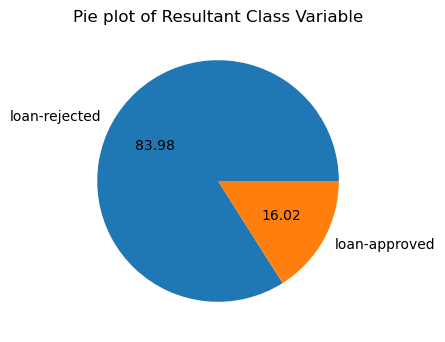

In [5]:
vc =df.loan.value_counts()
print(vc)
plt.figure(figsize =(5,4),dpi =100);plt.title ("Pie plot of Resultant Class Variable")
plt.pie(x=vc,autopct ='%.2f' ,labels=['loan-rejected','loan-approved']) ;plt.show

<font size="6" color="blue">Univariate analysis of age group using seaborn histogram</font>

<AxesSubplot:xlabel='age', ylabel='Count'>

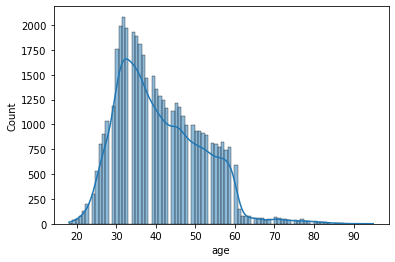

In [6]:
sns.histplot(df.age, kde=True)

<font size="6" color="blue">Bi-variate analysis of loan with other features</font>

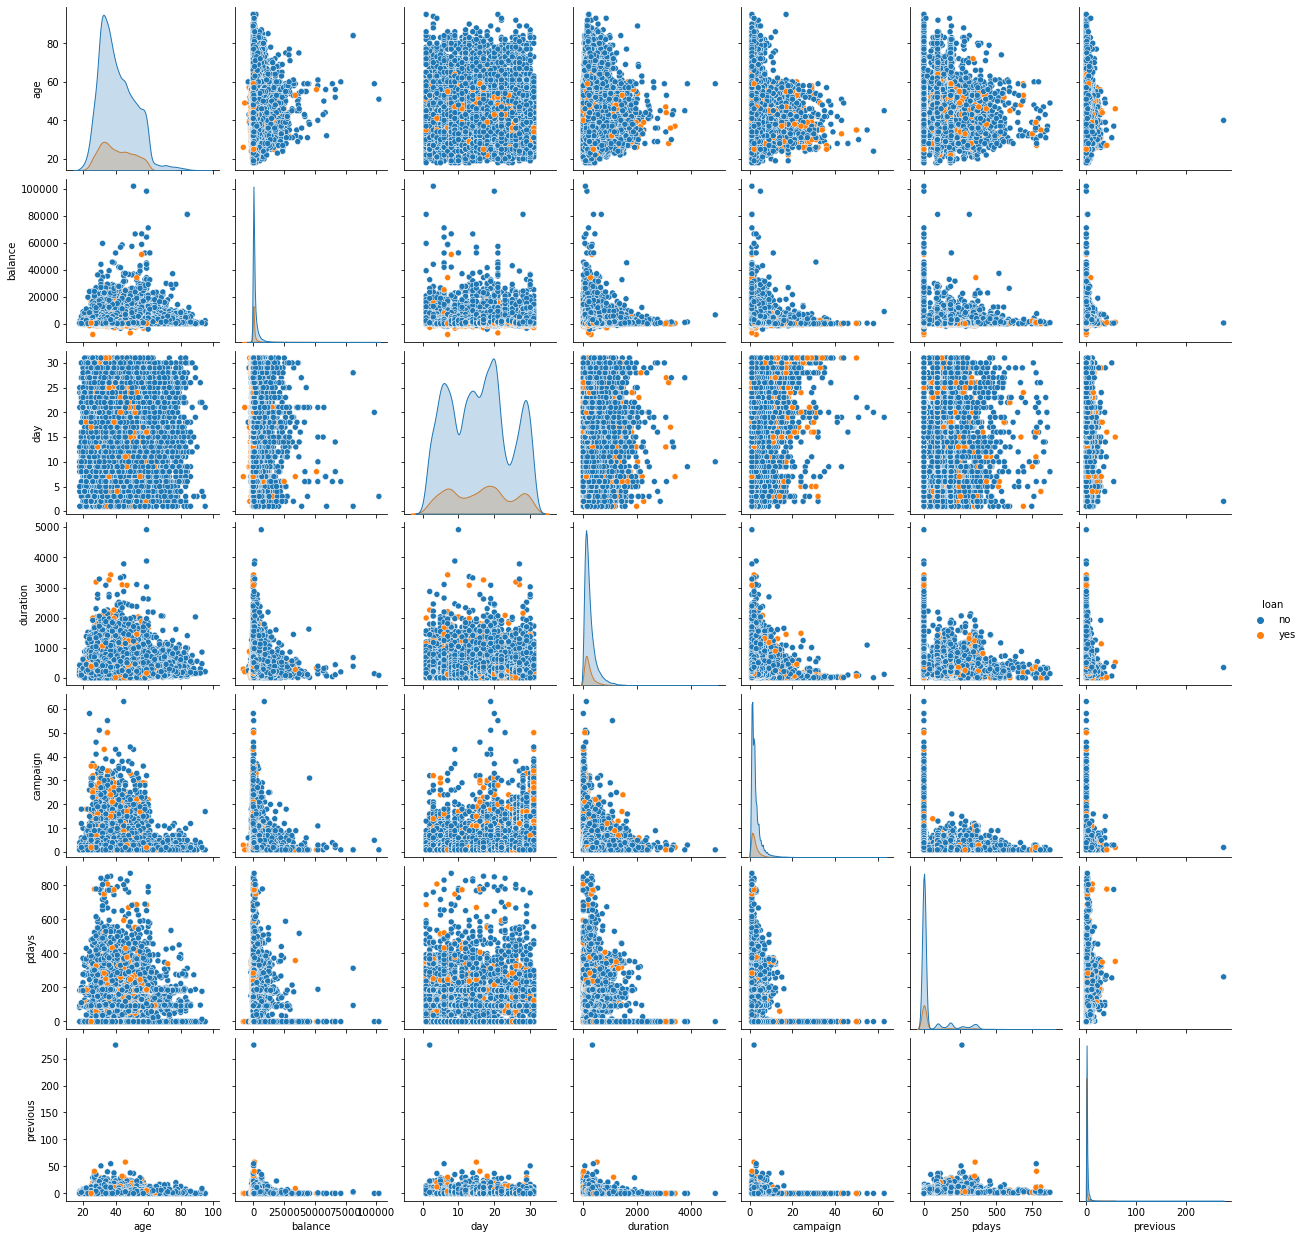

In [7]:
sns.pairplot(df, hue="loan", diag_kind = 'kde')

<font size="6" color="blue">Perform groupby using pivot table in pandas, compute the mean, median, min, max and std dev</font>

Anaylysing average balance maintained by job profile and their loan approval status.

In [8]:
pd.pivot_table(df,index='job',columns='loan',values='balance',aggfunc=np.average)

loan,no,yes
job,,
admin.,1240.639474,693.794147
blue-collar,1159.857977,691.570071
entrepreneur,1627.134394,1185.778090
housemaid,1476.002757,793.940789
management,1885.462767,965.735036
retired,2157.630691,887.038835
self-employed,1801.117778,745.139738
services,1093.751055,613.442584
student,1391.769978,1101.833333


Analyzing which age group has maximum loan approval / rejection.

In [17]:
pd.pivot_table(data=df, index='loan', values=['age'], aggfunc='median')

,age
loan,
no,39
yes,39


Maximum balance maintained by each job profile.

In [25]:
pd.pivot_table(data=df, index='job', values=['balance'], aggfunc=np.max)

,balance
job,
admin.,64343
blue-collar,66653
entrepreneur,59649
housemaid,45141
management,102127
retired,81204
self-employed,52587
services,57435
student,24025


Minimum balance maintained by each job profile.

In [26]:
pd.pivot_table(data=df, index='job', values=['balance'], aggfunc=np.min)

,balance
job,
admin.,-1601
blue-collar,-8019
entrepreneur,-2082
housemaid,-1941
management,-6847
retired,-1598
self-employed,-3313
services,-2122
student,-679


<font size="6" color="blue">Find the missing values and clean them using mean imputation.</font>

Check for Nan in data frame

In [27]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Checking for count of zeroes for each column

In [29]:
#This is to find how many column wise zero(0) rows are there!
print(df.isin([0]).sum())

age              0
job              0
marital          0
education        0
default          0
balance       3514
housing          0
loan             0
contact          0
day              0
month            0
duration         3
campaign         0
pdays            0
previous     36954
poutcome         0
y                0
dtype: int64


In [30]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<h3>Observation</h3>

There are no Null or, Nan or, 0 values for non-categorical column.

<font size="6" color="blue">Convert the categorical features to dummy variables using either pandas function or python loop function.</font>

In [40]:
X_train_data = df[['age','loan','balance']]
bins= [0,2,4,13,20,60,110]
labels = ['Infant','Toddler','Kid','Teen','Adult','Senior Citizen']
X_train_data['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
print(X_train_data)

       age loan  balance        AgeGroup
0       58   no     2143           Adult
1       44   no       29           Adult
2       33  yes        2           Adult
3       47   no     1506           Adult
4       33   no        1           Adult
...    ...  ...      ...             ...
45206   51   no      825           Adult
45207   71   no     1729  Senior Citizen
45208   72   no     5715  Senior Citizen
45209   57   no      668           Adult
45210   37   no     2971           Adult

[45211 rows x 4 columns]


<ipython-input-40-4f2a7eaf9638>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_data['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


In [41]:
loan_info = pd.get_dummies(X_train_data, prefix_sep='_', drop_first=True)
print(loan_info)

       age  balance  loan_yes  AgeGroup_Toddler  AgeGroup_Kid  AgeGroup_Teen  \
0       58     2143         0                 0             0              0   
1       44       29         0                 0             0              0   
2       33        2         1                 0             0              0   
3       47     1506         0                 0             0              0   
4       33        1         0                 0             0              0   
...    ...      ...       ...               ...           ...            ...   
45206   51      825         0                 0             0              0   
45207   71     1729         0                 0             0              0   
45208   72     5715         0                 0             0              0   
45209   57      668         0                 0             0              0   
45210   37     2971         0                 0             0              0   

       AgeGroup_Adult  AgeGroup_Senior 

<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Tangerine">    
<div style="font-family: 'Tangerine', serif; text-align:center; font-size: 35px; text-shadow: 4px 4px 4px #aaa;"> ... The End ...</div>